#**Python+Keras(Tensorflow)でちょっとだけ体験する深層学習（VGG16を使った転移学習）**

経済統計a第14回で学んだ深層学習をPython+Kerasで**ちょっとだけ体験する**方法（VGG16を使った転移学習）を説明します。なお、グレース・ホッパー准将の話を少しだけ最後に入れました。

> このノートブックでの目標は履修生に「深層学習で少し遊んでもらう」ことです。そのため、Kerasでトレーニング済みのVGG16を利用する方法のみを解説しています。ガチで深層学習をすることは目標にしていませんので、ご注意ください。


なお、このノートブックは「[Pythonの第一歩](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_python入門_1_basic.ipynb)」をすでに読んでいることを前提にしています。

**Kerasとは？**
<br>
KerasはTensorFlow の高レベルAPIである・・・と一般には説明されますが、我々のような「人工知能素人」は「深層学習ができる便利なモジュール（ライブラリ）」くらいに思っておけば問題ありません。

**Keras (TensorFlow) 公式サイト**<br>
https://www.tensorflow.org/guide/keras?hl=en

筆者は深層学習素人なので、このノートブックは以下の参考文献に基づいて作成しました。ありがとうございます！
<br>
**参考文献**<br>
https://www.tensorflow.org/tutorials/quickstart/beginner?hl=en<br>
https://www.tensorflow.org/guide/keras/sequential_model?hl=en<br>
https://github.com/sudhir2016/Google-Colab-3<br>
https://tensorflow.classcat.com/2019/10/09/tf20-tutorials-load-data-tfrecord/<br>
https://notebook.community/tensorflow/docs-l10n/site/ja/r1/tutorials/images/hub_with_keras

In [22]:
# 最初に重要な呪文を唱えます。
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img
#Deprecated: from keras.preprocessing.image import load_img
#Not necessary: from tensorflow.keras.utils import limg_to_array
#Not necessary: from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
#print(tf.__version__)
#print(keras.__version__)

VGG16()という関数でVGG16を読み込みます。VGG16は16層の深層学習モデルです。print()を使って実際に16層であることを確認してみましょう。

In [23]:
model = VGG16()
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

次にkerasのメソッドget_file()を使ってネットから写真（JPG）をダウンロードしましょう。

In [24]:

image = tf.keras.utils.get_file('grace_hopper.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
#image = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')

load_img()を使って、先ほどダウンロードした画像imageを224×224のフォーマットに直します。

In [25]:
image = load_img(image, target_size=(224, 224))

メソッドimshow()を使ってフォーマットし直した画像を表示します。

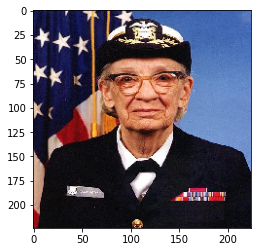

In [26]:
plt.imshow(image)

ちなみにここに表示された女性はグレース・ホッパー准将といいます（後述）。

In [27]:
image = tf.keras.preprocessing.image.img_to_array(image)

In [28]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [29]:
image = preprocess_input(image)

In [30]:
p = model.predict(image)

1/1 [==============================] - 1s 1s/step


In [31]:
label = decode_predictions(p)
print(label)

[[('n03763968', 'military_uniform', 0.38782614), ('n02883205', 'bow_tie', 0.2898344), ('n04350905', 'suit', 0.100351304), ('n02865351', 'bolo_tie', 0.029840557), ('n03110669', 'cornet', 0.026780019)]]


**[参考]グレース・ホッパー：COBOLとバグ**

プログラム上の間違いをバグといいますが、それはグレース・ホッパーがマークIIというコンピューターに蛾（バグ）が挟まって故障を引き起こしたと記録したことから始まると言われています。

またホッパーはCOBOLというプログラム言語を開発したことでも有名です。「COBOL？知らないなぁ」と思う人が多いかもしれませんが、今でも使わており、社会の役に立っています。ホッパーはCOBOLを開発した功績でアメリカ海軍の准将になりました。

https://www.history.navy.mil/browse-by-topic/people/namesakes/grace-hopper.html

https://www.atlasobscura.com/places/grace-hoppers-bug

**[参考文献]Keras（Tensorflow）について知りたい人へ**<br>
以下のサイトのチュートリアルが分かりやすいです。<br>
https://www.tensorflow.org/tutorials/quickstart/beginner?hl=en